In [15]:
import pandas as pd
import numpy as np

In [16]:
from sklearn.datasets import load_digits

In [17]:
data = load_digits()

In [18]:
X = pd.DataFrame(data['data'])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [19]:
Y = pd.Series(data['target'])

In [20]:
Ydummy = pd.get_dummies(Y)
Ydummy.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


## Решающее дерево

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
from sklearn.model_selection import GridSearchCV

Пробуем разную глубину дерева, тип ветвления и критерий оценки

In [94]:
depths = np.arange(1,30)
grid = {'max_depth': depths, 'criterion':['gini','entropy'], 'splitter':['random','best']}

In [95]:
gridsearch_tree = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)

In [96]:
gridsearch_tree.fit(X,Ydummy)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'criterion': ['gini', 'entropy'], 'splitter': ['random', 'best']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [99]:
sorted(gridsearch_tree.grid_scores_, key = lambda x: -x.mean_validation_score)

C:\Users\asigachev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


mean: 0.81636, std: 0.02582, params: {'criterion': 'gini', 'max_depth': 19, 'splitter': 'random'}

In [98]:
gridsearch_tree.best_params_

{'criterion': 'gini', 'max_depth': 19, 'splitter': 'random'}

## Метод K ближайших соседей

In [28]:
from sklearn.neighbors import KNeighborsClassifier

Пробуем разное число соседей и варианты взвешивания расстояния

In [29]:
neighbors = np.arange(2,10)
weights = ['uniform','distance']
grid_knn = {'n_neighbors':neighbors, 'weights':weights}

In [30]:
gridsearch_kNN = GridSearchCV(KNeighborsClassifier(), grid_knn, scoring='accuracy', cv=5)

In [31]:
gridsearch_kNN.fit(X,Ydummy)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [123]:
sorted(gridsearch_kNN.grid_scores_, key = lambda x: -x.mean_validation_score)[0]

C:\Users\asigachev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


mean: 0.96494, std: 0.01287, params: {'n_neighbors': 2, 'weights': 'distance'}

In [33]:
gridsearch_kNN.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

## Логистическая регрессия

In [34]:
from sklearn.linear_model import LogisticRegression

Пробуем разные значения параметра регуляризации

In [35]:
c_values = 10**np.linspace(-3,1,5)
c_values

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01])

In [36]:
grid_log_reg = {'C':c_values}
gridsearch_log_reg = GridSearchCV(LogisticRegression(), grid_log_reg, scoring='accuracy', cv=5)

In [37]:
gridsearch_log_reg.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [51]:
sorted(gridsearch_log_reg.grid_scores_, key = lambda x: -x.mean_validation_score)[1][1]

C:\Users\asigachev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.92598775737340011

# Сравнение моделей

In [41]:
import matplotlib.pyplot as plt

In [101]:
logreg_result = sorted(gridsearch_log_reg.grid_scores_, key = lambda x: -x.mean_validation_score)[0]
knn_result = sorted(gridsearch_kNN.grid_scores_, key = lambda x: -x.mean_validation_score)[1]
tree_result = sorted(gridsearch_tree.grid_scores_, key = lambda x: -x.mean_validation_score)[0]

C:\Users\asigachev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\asigachev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\asigachev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [107]:
tree_result[2]

array([ 0.82222222,  0.78333333,  0.83286908,  0.85236769,  0.79108635])

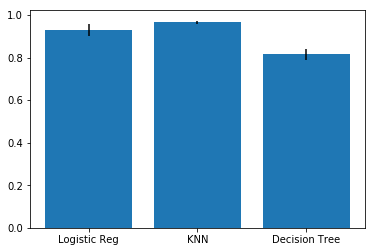

In [128]:
fig, ax = plt.subplots()
ax.set_xticks([1,2,3])
ax.set_xticklabels(('Logistic Reg', 'KNN', 'Decision Tree'))
plt.bar([1,2,3], [logreg_result[1],knn_result[1],tree_result[1]], 
        yerr = [logreg_result[2].std(),knn_result[2].std(),tree_result[2].std()])
plt.show()

# Лучший вариант

In [129]:
knn_result

mean: 0.96494, std: 0.00797, params: {'n_neighbors': 4, 'weights': 'distance'}